# Semana 1: Exploración del problema y del dataset

## 1. Cargar y visualizar señales ECG

### Recomendación: usar matplotlib, wfdb, scipy.io

In [2]:
# Define una función reutilizable para cargar y plotear un segmento ECG
def plot_ecg_segment(data_dir):
  
    import os
    import scipy.io as sio
    import matplotlib.pyplot as plt
    import numpy as np

     # Buscamos archivos .mat y tomamos sólo el primero
    mat_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.mat')])
    if not mat_files:
        raise FileNotFoundError(f"No se encontraron .mat en {data_dir}")
    file0 = mat_files[0]

    # Cargamos la señal
    mat = sio.loadmat(os.path.join(data_dir, file0))
    if 'val' in mat:
        signal = mat['val']
    elif 'ECG' in mat:
        signal = mat['ECG']
    else:
        raise KeyError("La señal no está bajo 'val' ni 'ECG'")
    signal = signal.flatten()

    # Parámetros internos fijos
    fs = 300            # Hz
    duration = 10       # segundos

    # Tomamos los primeros 10 s
    n_samples = min(len(signal), fs*duration)
    time = np.arange(n_samples) / fs
    segment = signal[:n_samples]


    plt.figure(figsize=(12,4))
    plt.plot(time, segment, lw=0.8)
    plt.title(f"ECG – {file0} ({duration} s)")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.xlim(0, duration)
    plt.show()

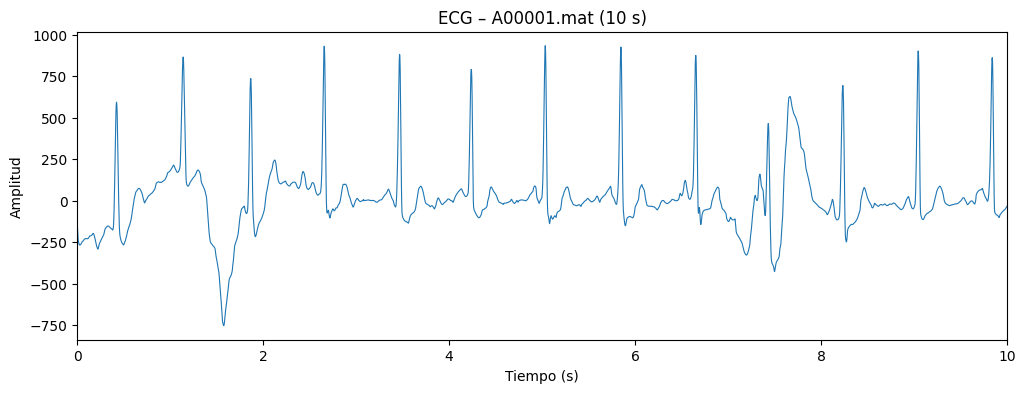

In [3]:
data_dir = r"c:\Users\gusta\Documents\Gitkraken\proyecto_ML\training2017"
plot_ecg_segment(data_dir)